In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import time

sys.path.append('../code/')
from interpolation import cfl_interpolation
from diusst_eulera import diusst_eulera
from diusst_eulerb import diusst_eulerb
from diusst_rk4a import diusst_rk4a
from diusst_rk4b import diusst_rk4b
from diusst_eulerc import diusst_eulerc

from diusst_funcs import make_mesh

## Settings

In [2]:
# Fit parameters
param_names = ['kappa', 'mu', 'attenu', 'k0', 'gamma']
parama = np.array([1e-4, 1e-4, 2.5])
paramb = np.array([3e-4, 1e-4, 2.5])
paramc = np.array([2e-4, 1e-4, 2.5, 0.95, 2])
param_max = np.array([5e-4, 1e-4, 2.5])

# DIUSST model
scheme = 'euler'
dz0 = 0.10
ngrid = 50
diffu = 1
opac = 1
k_mol = 1e-7
maxwind = 10

# Dataset
data_path = '../data/bayesian_training/'
data_filename = 'training_minnett_ssterr03-10_humid10.csv'
data_interval = [1175,1470]

## Data

In [3]:
# Load dataset
data_orig = pd.read_csv(data_path+data_filename)[data_interval[0]:data_interval[1]]

# interpolate to meet CFL condition
data, dtlist = cfl_interpolation(data_orig, dz0=dz0, ngrid=ngrid,
        a=0, b=1, k_eddy_max=param_max[0], maxwind=maxwind,)
        #save=output_path+timestamp+'_'+run_id)


# extract data
ftemp = np.mean(data['ftemp'].to_numpy(np.float64))
sst_data = data['sst'].to_numpy(np.float64) - data['ftemp'].to_numpy(np.float64)
sst_err = data['sst_err'].to_numpy(np.float64)
times = data['times'].to_numpy(np.float64)
wind = data['wind'].to_numpy(np.float64)
atemp = data['atemp'].to_numpy(np.float64)
swrad = data['swrad'].to_numpy(np.float64)
humid = data['humid'].to_numpy(np.float64)

+++ Variable time-step interpolation +++
Interpolated dataset has 51127 time steps with average length 7.126 s.
Constant dt interpolation would require dt = 1.717 s --> 155081 steps.
Computation time will be reduced by 67.032 %
++++++++++++++++++++++++++++++++++++++++


In [4]:
kappas = [5e-5,1e-4,2e-4,4e-4]

simkappas = []
for i in range(len(kappas)):
    
    simstart = time.time()

    simkappas.append(diusst_eulerc(
                times, atemp, swrad, u_data=wind, sa_data=humid, T_f=ftemp,
                k_eddy=kappas[i], mu=0.01, attenu=2.5, k0=0.9, gamma=10,
                opac=opac, k_mol=k_mol,
                dz=dz0, ngrid=ngrid))

    print(time.time()-simstart)

3.6178815364837646
2.526493549346924
2.521559476852417
2.4490411281585693


[Text(0.5, 1.0, 'SST-ftemp')]

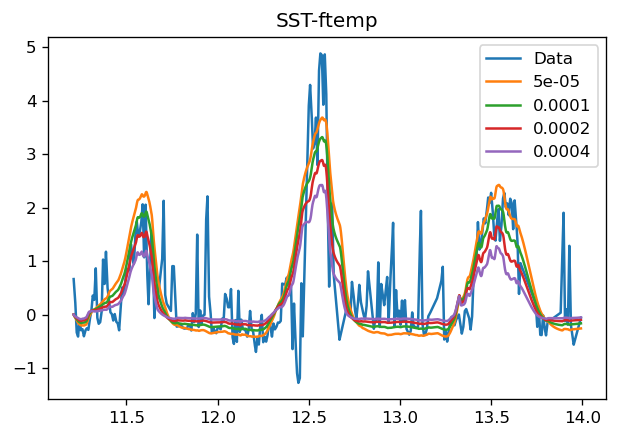

In [5]:
fig, ax = plt.subplots(dpi=120)
ax.plot(times/86400,sst_data, label='Data')
for i in range(len(kappas)):
    ax.plot(times/86400,simkappas[i][0][:,0]-ftemp,label=kappas[i])

ax.legend()
ax.set(title='SST-ftemp')

In [6]:
mus = [0.001,0.005,0.01,0.02,0.05]

simmus = []
for i in range(len(mus)):
    
    simstart = time.time()

    simmus.append(diusst_eulerc(
                times, atemp, swrad, u_data=wind, sa_data=humid, T_f=ftemp,
                k_eddy=1e-4, mu=mus[i], attenu=2.5, k0=0.9, gamma=10,
                opac=opac, k_mol=k_mol,
                dz=dz0, ngrid=ngrid))

    print(time.time()-simstart)

2.9183688163757324
2.4508485794067383
2.5658748149871826
2.5129811763763428
2.556994915008545


[Text(0.5, 1.0, 'SST-ftemp')]

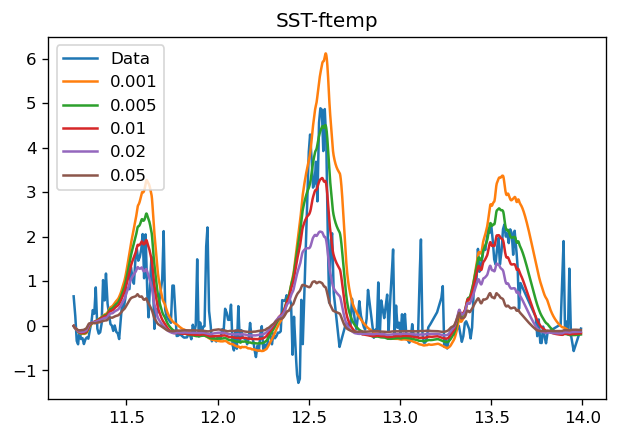

In [7]:
fig, ax = plt.subplots(dpi=120)
ax.plot(times/86400,sst_data, label='Data')
for i in range(len(mus)):
    ax.plot(times/86400,simmus[i][0][:,0]-ftemp,label=mus[i])

ax.legend()
ax.set(title='SST-ftemp')

In [8]:
attenus = [1,2,3,4]

simattenus = []
for i in range(len(attenus)):
    
    simstart = time.time()

    simattenus.append(diusst_eulerc(
                times, atemp, swrad, u_data=wind, sa_data=humid, T_f=ftemp,
                k_eddy=1e-4, mu=0.01, attenu=attenus[i], k0=0.9, gamma=10,
                opac=opac, k_mol=k_mol,
                dz=dz0, ngrid=ngrid))

    print(time.time()-simstart)

2.5141241550445557
3.2788779735565186
4.075505018234253
2.8142969608306885


[Text(0.5, 1.0, 'SST-ftemp')]

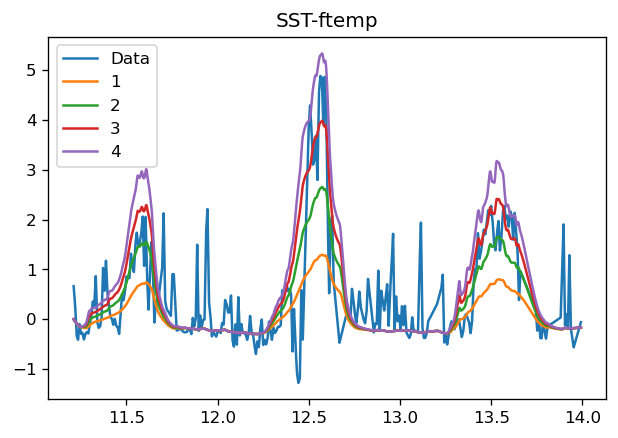

In [9]:
fig, ax = plt.subplots(dpi=120)
ax.plot(times/86400,sst_data, label='Data')
for i in range(len(attenus)):
    ax.plot(times/86400,simattenus[i][0][:,0]-ftemp,label=attenus[i])

ax.legend()
ax.set(title='SST-ftemp')

In [10]:
k0s = [0,0.1,0.7,0.8,0.9,0.99]

simk0s = []
for i in range(len(k0s)):
    
    simstart = time.time()

    simk0s.append(diusst_eulerc(
                times, atemp, swrad, u_data=wind, sa_data=humid, T_f=ftemp,
                k_eddy=1e-5, mu=0.01, attenu=3, k0=k0s[i], gamma=1,
                opac=opac, k_mol=k_mol,
                dz=dz0, ngrid=ngrid))

    print(time.time()-simstart)

2.6279456615448
3.097921848297119
2.551978588104248
3.308155059814453
2.6495373249053955
2.501587152481079


[Text(0.5, 1.0, 'SST-ftemp')]

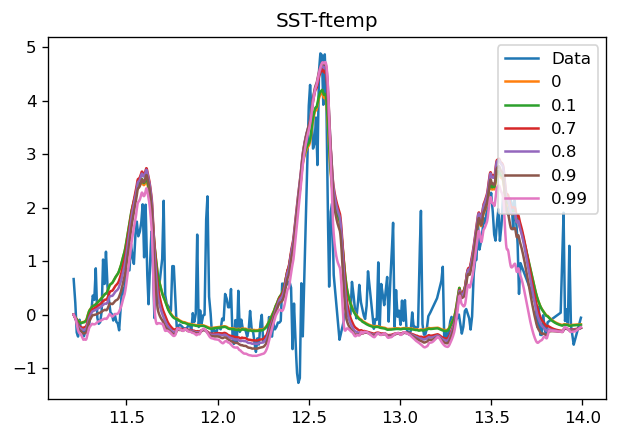

In [11]:
fig, ax = plt.subplots(dpi=120)
ax.plot(times/86400,sst_data, label='Data')
for i in range(len(k0s)):
    ax.plot(times/86400,simk0s[i][0][:,0]-ftemp,label=k0s[i])

ax.legend()
ax.set(title='SST-ftemp')

In [63]:
x = make_mesh(0.1,50)[0]
def f(x,a,b):
    return ((1-a*np.exp(x/b))/(1-a*np.exp(-10/b)))

def g(x,a):
    return a*np.exp(x*np.log(a)/10)

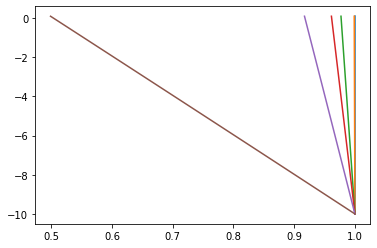

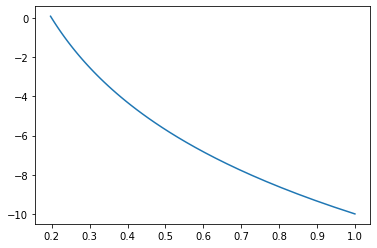

In [67]:
for i in range(len(k0s)):
    plt.plot(f(x,k0s[i],1000),x)
plt.show()
plt.plot(g(x,0.2),x)

In [14]:
gammas = [1,2,5,10,100]

simgammas = []
for i in range(len(gammas)):
    
    simstart = time.time()

    simgammas.append(diusst_eulerc(
                times, atemp, swrad, u_data=wind, sa_data=humid, T_f=ftemp,
                k_eddy=5e-5, mu=0.01, attenu=3, k0=0.9, gamma=gammas[i],
                opac=opac, k_mol=k_mol,
                dz=dz0, ngrid=ngrid))

    print(time.time()-simstart)

5.253685235977173
4.17743182182312
2.5151915550231934
2.4310150146484375
2.4193856716156006


[Text(0.5, 1.0, 'SST-ftemp')]

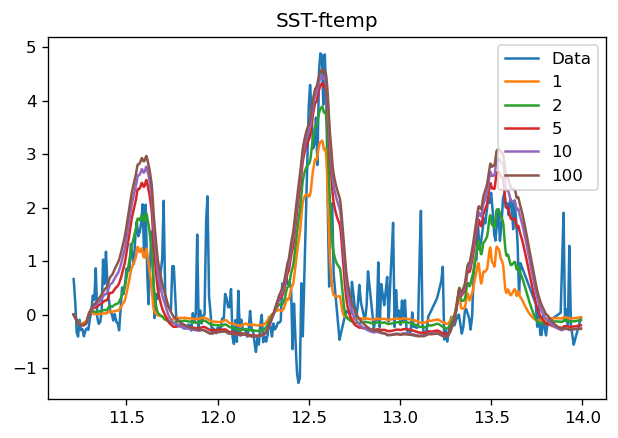

In [15]:
fig, ax = plt.subplots(dpi=120)
ax.plot(times/86400,sst_data, label='Data')
for i in range(len(gammas)):
    ax.plot(times/86400,simgammas[i][0][:,0]-ftemp,label=gammas[i])

ax.legend()
ax.set(title='SST-ftemp')

In [22]:
sim1 = diusst_eulera(
                times, atemp, swrad, u_data=wind, sa_data=humid, T_f=ftemp,
                k_eddy=5e-5, mu=0.005, attenu=3.5,
                opac=opac, k_mol=k_mol,
                dz=dz0, ngrid=ngrid)

In [28]:
sim2 = diusst_eulerb(
                times, atemp, swrad, u_data=wind, sa_data=humid, T_f=ftemp,
                k_eddy=3e-4, mu=0.005, attenu=3.5,
                opac=opac, k_mol=k_mol,
                dz=dz0, ngrid=ngrid)

In [33]:
sim3 = diusst_eulerc(
                times, atemp, swrad, u_data=wind, sa_data=humid, T_f=ftemp,
                k_eddy=5e-5, mu=0.005, attenu=3.5, k0=0, gamma=1,
                opac=opac, k_mol=k_mol,
                dz=dz0, ngrid=ngrid)

In [34]:
sim4 = diusst_eulerc(
                times, atemp, swrad, u_data=wind, sa_data=humid, T_f=ftemp,
                k_eddy=3e-4, mu=0.005, attenu=3.5, k0=1, gamma=100,
                opac=opac, k_mol=k_mol,
                dz=dz0, ngrid=ngrid)

[Text(0.5, 1.0, 'SST-ftemp')]

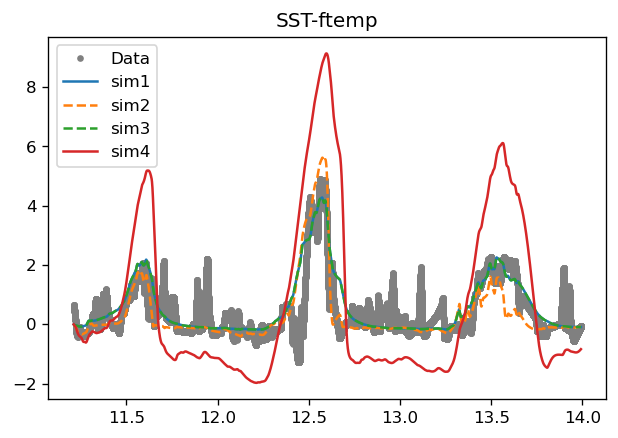

In [37]:
fig, ax = plt.subplots(dpi=120)
ax.plot(times/86400,sst_data,'.',c='gray', label='Data')
ax.plot(times/86400,sim1[0][:,0]-ftemp,label='sim1')
ax.plot(times/86400,sim2[0][:,0]-ftemp,'--',label='sim2')
ax.plot(times/86400,sim3[0][:,0]-ftemp,'--',label='sim3')
ax.plot(times/86400,sim4[0][:,0]-ftemp,label='sim4')

ax.legend()
ax.set(title='SST-ftemp')

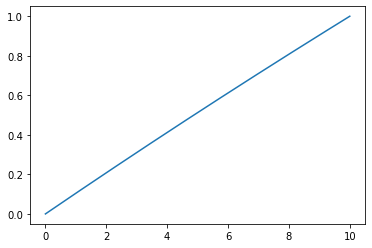

In [62]:
xx = np.linspace(0,10,200)
plt.plot(xx,(1-np.exp(-xx/100))/(1-np.exp(-10/100)))